## Children's Oncology Group (COG) - Cell Line Selection Prioritization

We are ordering many COG cell lines to include in the Pediatric Cancer Cell Morphology Atlas (PCCMA).
We are ordering these in tranches.

We will periodically update the `pccma_cog_prioritization_list.csv`, as we receive and onboard the cell lines of each tranche.
This google sheet is named `PCCMA COG cell lines` internally.

### Initial prioritization

1. Aggressive non-NBL cell lines
2. Highly aggressive NBL cell lines (PD+)
3. non-NBL cell lines at diagnosis
4. NBL cell lines at diagnosis or single progression (PD-)

#### We further broke down these prioritizations into letter groups

- 1a/b: If group 1 grows in (a) 20%O2 or (b) less than 20%O2
- 2a/b/c: If group 2 grows in (a) 20%O2 or (b) less than 20%O2, or, (c) if a PD- cell line is matched with PD+
- 3a/b: If group 3 grows in (a) 20%O2 or (b) less than 20%O2
- 4a/b/c/d/e: If group 4 grows in (a) 20%O2 with known telomere maintenance or (b) with unknown telomere maintenance or (c) grows in less than 20% O2 with matches to other cell lines or (d) with known telomere maintenance without matches or (e) unknown telomere maintenance without matches

#### We included a few other criteria, which influenced priorization accordingly

- longdoubling: If the cell line has a doubling time >80 hours (we included these sparingly)
- PDmatch: If cell lines have matches for progressive disease (we increased these in priority)
- DXmatch: If cell lines have matches for both diagnosis and progressive disease (we increased these in priority)

In [1]:
import pathlib
import pandas as pd
import matplotlib

In [2]:
data_file = pathlib.Path("pccma_cog_prioritization_list.csv")
cog_line_df = pd.read_csv(data_file)

print(cog_line_df.shape)
cog_line_df.head(3)

(333, 39)


,Selected Rank,Cell Line,Priority,In Atlas?,Tranche,Phase of Therapy,Phase of therapy_Reynolds,Match Group ID,Sample Type,Age,...,2%O2,5%O2,20%O2,NB media,PDX,PDX MATCH PAIR,MATCH,DX/PD pair,Notes,Jaime notes
0,1,CHLA-10,1a,x,1.0,PD,NaN,NaN,thoracic lymph node,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,CHLA-113,1a,x,1.0,PD,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,CHLA-186,1a,x,1.0,PD-BMT,NaN,NaN,peritoneal fulid,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Select only those in the Atlas so far
cog_line_subset_df = cog_line_df.loc[cog_line_df["In Atlas?"] == "x", :]
print(cog_line_subset_df.shape)

(19, 39)


In [4]:
cog_line_df.columns

Index(['Selected Rank', 'Cell Line', 'Priority', 'In Atlas?', 'Tranche',
       'Phase of Therapy', 'Phase of therapy_Reynolds', 'Match Group ID',
       'Sample Type', 'Age', 'Cancer Type', 'Solid Tumor', 'PCCMA Initial',
       'priority_phase', 'TMM', '2%_O2', '5%_O2', '20%_O2', 'Media',
       'Doubling Time', 'Doubling Time_reynolds', 'Growth Properties', 'Model',
       'Sample Type_reynolds', 'Sample info', 'Date Received', 'Methylation',
       'RNAseq', 'WES', '2%O2', '5%O2', '20%O2', 'NB media', 'PDX',
       'PDX MATCH PAIR', 'MATCH', 'DX/PD pair', 'Notes', 'Jaime notes'],
      dtype='object')

<Axes: >

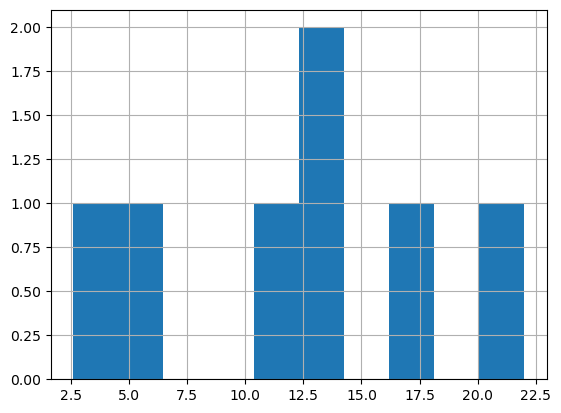

In [5]:
cog_line_subset_df.Age.hist()

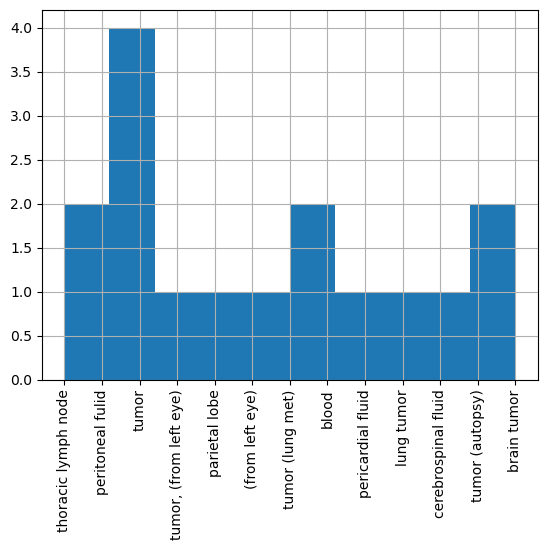

In [6]:
cog_line_subset_df.loc[:, "Sample Type"].hist()
matplotlib.pyplot.xticks(rotation=90);

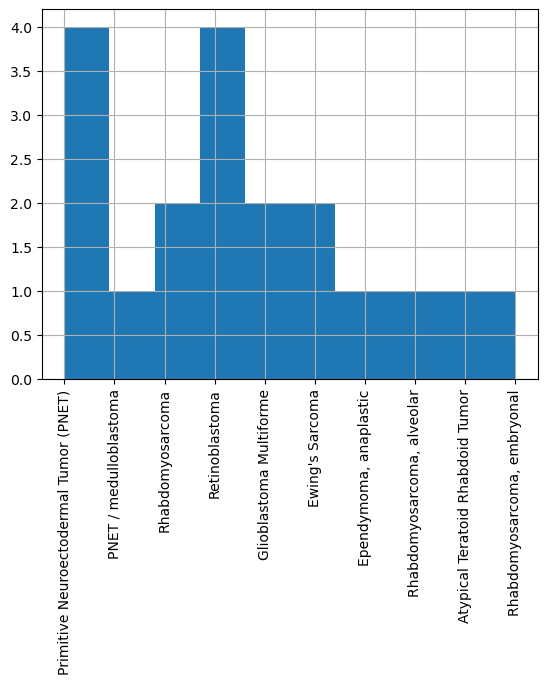

In [7]:
cog_line_subset_df.loc[:, "Cancer Type"].hist()
matplotlib.pyplot.xticks(rotation=90);